Problemas de **regressão** envolvem a predição de um valor numérico contínuo a partir de um conjunto de característiacs.

Neste exemplo, vamos construir um modelo para prever preços de casas a partir de características delas, como número de quartos e taxa de crimes na localização da casa.

## Leitura dos dados

Usaremos o pacote **pandas** para ler os dados.

Pandas é uma biblioteca de código aberto que permite a leitura de dados a partir de diversos formatos para uma estrutura tabular que pode ser acessada e processada por scripts Python.

In [1]:
# Testando se a biblioteca está instalada corretamente e consegue ser importada
import pandas as pd

Neste exercício, usaremos o dataset [Boston Housinh]((http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) para prever preços de casas a partir de características delas e de sua vizinhança.

In [2]:
# Carregue o arquivo 'datasets/boston.csv' usando o pandas
boston_housing_data = pd.read_csv('../datasets/boston.csv')

Pandas permite a leitura de nossos dados a partir de diferentes formatos. Veja [esse link](http://pandas.pydata.org/pandas-docs/stable/io.html) para uma lista de formatos suportados e as respectivas funções usadas para lê-los.

O tipo usado pelo pandas para representar essa tabela com nosso dataset carregado é chamada de `DataFrame`.

In [3]:
# Use o método head() para exibir as primeiras cinco linhas do dataset
boston_housing_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


*O método head() imprime as primeiras cinco linhas por padrão. Ele pode receber opcionalmente um argumento que especifique quantas linhas devem ser exibidas, como `boston.head(n=10)`.*

In [3]:
# Use o método info() para exibir algumas informações sobre o dataset
boston_housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


*O método info() exibe vários detalhes sobre o dataset, como a sua quantidade de linhas, quais  features estão presentes, qual é o tipo de cada feature e se existem valores em branco.*

In [4]:
# Use o método describe() apra exibir algumas estatísticas do dataset
boston_housing_data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


*O método describe() apenas mostra estatísticas de features numéricas. Se uma feature contém strings, por exemplo, ele não será capaz de mostrar informações sobre ela.*

## Visualização de dados

Após ler os dados em um DataFrame do pandas e ter obtido uma visão geral do dataset, podemos criar gráficos para visualizar o "formato" desses dados.

Usaremos a biblitoeca *Matplotlib* para criar esses gráficos.

### Exemplo

Suponha que lhe seja dada a seguinte informação sobre quatro datasets:

In [6]:
datasets = pd.read_csv('../datasets/anscombe.csv')

for i in range(1, 5):
    dataset = datasets[datasets.Source == 1]
    print('Dataset {} (X, Y) mean: {}'.format(i, (dataset.x.mean(), dataset.y.mean())))

print('\n')
for i in range(1, 5):
    dataset = datasets[datasets.Source == 1]
    print('Dataset {} (X, Y) std deviation: {}'.format(i, (dataset.x.std(), dataset.y.std())))

print('\n')
for i in range(1, 5):
    dataset = datasets[datasets.Source == 1]
    print('Dataset {} correlation between X and Y: {}'.format(i, dataset.x.corr(dataset.y)))

Dataset 1 (X, Y) mean: (9.0, 7.500909090909093)
Dataset 2 (X, Y) mean: (9.0, 7.500909090909093)
Dataset 3 (X, Y) mean: (9.0, 7.500909090909093)
Dataset 4 (X, Y) mean: (9.0, 7.500909090909093)


Dataset 1 (X, Y) std deviation: (3.3166247903554, 2.031568135925815)
Dataset 2 (X, Y) std deviation: (3.3166247903554, 2.031568135925815)
Dataset 3 (X, Y) std deviation: (3.3166247903554, 2.031568135925815)
Dataset 4 (X, Y) std deviation: (3.3166247903554, 2.031568135925815)


Dataset 1 correlation between X and Y: 0.81642051634484
Dataset 2 correlation between X and Y: 0.81642051634484
Dataset 3 correlation between X and Y: 0.81642051634484
Dataset 4 correlation between X and Y: 0.81642051634484


Todos eles possuem aproximadamente a mesma média, desvio-padrão e correlação. Quão parecidos esses datasets devem ser?

![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/638px-Anscombe%27s_quartet_3.svg.png)

Esse conjunto de datasets são conhecidos como o [Quarteto de Anscombe](https://en.wikipedia.org/wiki/Anscombe's_quartet) e eles costumam ser usados para ilustrar como confiar apenas em estatísticas como uma forma de caracterizar conjuntos de dados podem induzir a conclusões incorretas.

In [7]:
# Na primeira vez que o matplotlib é importado, pode ser exibido algum tipo
# de alerta relacionado às fontes do sistema dependendo da sua configuração
import matplotlib.pyplot as plt
# Essa linha permite que os gráficos gerados apareçam diretamente no notebook
# ao invés de serem abertos em uma janela ou arquivo separado.
%matplotlib inline

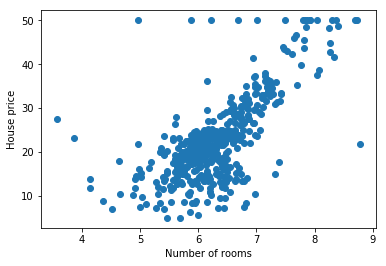

In [8]:
# Extraia os preços das casas e a quantidade média de cômodos em duas variáveis separadas
prices = boston_housing_data.medv
rooms = boston_housing_data.rm

# Crie um scatterplot dessas duas features usando plt.scatter()
plt.scatter(rooms, prices)
# Especifique labels para os eixos X e Y
plt.xlabel('Number of rooms')
plt.ylabel('House price')
# Exiba o gráfico
plt.show()

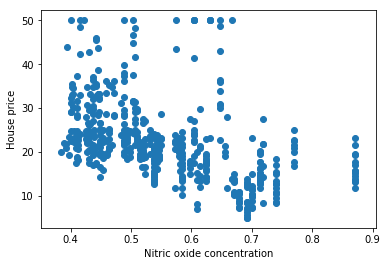

In [9]:
# Extraia os preços das casas e o índice de poluição da vizinhança em duas variáveis separadas
prices = boston_housing_data.medv
nox = boston_housing_data.nox

# Crie um scatterplot dessas duas features usando plt.scatter()
plt.scatter(nox, prices)
# Especifique labels para os eixos X e Y
plt.xlabel('Nitric oxide concentration')
plt.ylabel('House price')
# Exiba o gráfico
plt.show()

## Previsão de preços

Vimos nos gráficos anteriores que algumas features parecem ter uma relação linear com os preços das casas. Usaremos então a classe [LinearRegression to Scikit-Learn](scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) para modelar essa relação e conseguir prever preços de casas a partir dessas features.

O exemplo abaixo constrói um modelo LinearRegression usando o número médio de cômodos para prever o preço da casa:

In [10]:
# Primeiro, extraia os preditores (as features que serão usadas para
# prever o preço das casas) e a saída (os preços das casas) em
# variáveis separadas.

x = rooms.values.reshape(-1, 1) # Extraia os valores da coluna 'rm' aqui
y = prices.values.reshape(-1, 1) # Extraia os valores da coluna 'medv' aqui

print('x: {}'.format(x[0:3, :]))
print('y: {}'.format(y[0:3]))

x: [[ 6.575]
 [ 6.421]
 [ 7.185]]
y: [[ 24. ]
 [ 21.6]
 [ 34.7]]


*A chamada `values.reshape(-1, 1)` é necessária nesse caso porque o scikit-learn espera que os preditores estejam na forma de uma matriz - isto é, em um formato de array bidimensional. Como estamos usando apenas um preditor, o pandas acaba representando isso como um array unidimensional, então precisamos "reformatá-lo" em uma "matriz de uma coluna só". Esse passo não é necessário se estivermos usando mais de um preditor para treinar um modelo do scikit-learn, como será visto no próximo exemplo.*

Agora que temos o dataset isolado em preditores e saídas, eles precisam ser divididos em dois conjuntos diferentes: um **conjunto de treinamento** e um **conjunto de teste**.

Esse passo é necessário caso você precise estimar o quão bem seu modelo treinado se comportará quando for usado para prever preços de novas casas: é necessário usar o conjunto de *treinamento* para treinar o modelo e então calcular a sua taxa de erros no conjunto de *teste*.

In [11]:
# Use a função train_test_split() do scikit-learn para dividir os dados em dois conjuntos.
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

RANDOM_STATE = 4321
xtr, xts, ytr, yts = train_test_split(x, y, random_state=RANDOM_STATE) # Chame a função train_test_split aqui

*Se tentarmos estimar a performance do modelo no mesmo conjunto de dados que foi usado para treiná-lo, obteremos uma estimativa enviesada já que o modelo foi treinado para minimizar sua taxa de erro exatamente nos exemplos presentes no conjunto de treinamento. Para estimar corretamente o quão bem o modelo se comportará na prática, ele precisa se testado em um conjunto de dados com o qual ele nunca teve contato.

In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(xtr, ytr) # Treine um modelo LinearRegression aqui usando o conjunto de treinamento

lr.predict(6)

array([[ 19.81986275]])

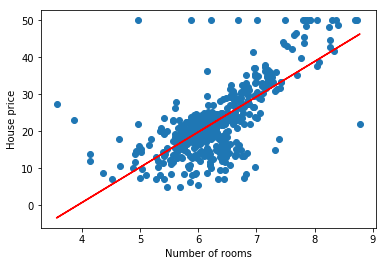

In [13]:
# Calcule os preços previstos pelo modelo treinado
predicted_prices = lr.predict(x)

# Crie um scatterplot dessas duas propriedades usando plt.scatter()
plt.scatter(rooms, prices)
# Crie um line plot exibindo os valores previstos em vermelho
plt.plot(rooms, predicted_prices, 'r')
# Crie labels para os eixos X e Y
plt.xlabel('Number of rooms')
plt.ylabel('House price')
# Exiba o gráfico
plt.show()

Podemos agora usar a função [mean_squared_error do Scikit-Learn](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) para calcular o erro total médio do modelo nos dados do conjunto de teste.

In [14]:
# Use o conjunto de testes para avaliar a performace do modelo
from sklearn.metrics import mean_squared_error

# Calcule o mean_squared_error do modelo aqui
mean_squared_error(yts, lr.predict(xts))

50.248441237303979

O erro aqui provavelmente será bem alto. Usaremos então todas as features do dataset como preditores para tentar prever os preços das casas e vamos checar o quanto isso melhora a performance do modelo.

In [15]:
X = boston_housing_data.drop('medv', axis=1) # Use o método drop() aqui para descartar a coluna 'medv' e manter as demais.
y = boston_housing_data.medv # Extraia o preço das casas aqui a partir da coluna 'medv'.

X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33


*O método drop(), por padrão, exclui linhas ao invés de colunas. Para descartar colunas, é necessário passar uma argumento adicional `axis=1`.*

In [16]:
from sklearn.model_selection import train_test_split

ANOTHER_RANDOM_STATE=1234
Xtr, Xts, ytr, yts = train_test_split(X, y, random_state=ANOTHER_RANDOM_STATE) # Divida o dataset em treinamente e teste

# Use o conjunto de treinamento para treinar um modelo LinearRegression
lr = LinearRegression().fit(Xtr, ytr)

# Calcule o mean_squared_error do modelo no conjunto de teste aqui
mean_squared_error(yts, lr.predict(Xts))

27.445922985339557

*Quais melhorias você acha que ainda poderiam ser feitas para se obter melhores resultados?*

### Uma observação final sobre a divisão dos dados

Os dados usados em machine learning geralmente são divididos em três partes:
* **Conjunto de treinamento**: Os dados usados para se treinar o modelo;
* **Conjunto de validação (não discutido nesse workshop)**: Esse conjunto é usado para selecionar o melhor modelo dentre diferentes algoritmos ou hiperparâmetros. A ideia é que você _não_ use esse conjunto para treinar seu modelo diretamente, mas sim para selecionar qual algoritmo, valores de hiperparâmetros, etc dão o melhor resultado durante a fase de treinamento;
* **Conjunto de teste**: Este é um conjunto usado para estimar a performance do modelo após ter-se treinado e selecionado o modelo final que será usado na prática. Esse conjunto é idealmente usado apenas uma vez para avaliar o quão bem o modelo se comporta quando ele trabalha com dados com os quais ele nunca teve contato antes.

Se quiser mais detalhes, pode checar [esse texto](https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7)(em inglês) para mais informações. Existem outras abordagens bastante populares como [Validação cruzada](https://machinelearningmastery.com/k-fold-cross-validation/) para se fazer seleção e avaliação de modelos mas elas não serão cobertas nesse workshop.